# 특성 공학과 규제

## 데이터 준비

In [1]:
import pandas as pd

In [2]:
# 길이, 높이 두께
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(perch_full, perch_weight, random_state = 42 )     
# random_state 는 실무에서 쓸 필요가 없음. 교재와 일치된 결과를 내기 위해서 추가한 것

## 사이킷런의 변환기

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# polynomialFeatures 이해를 위한 코드

# degree = 2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**3
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [11]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [13]:
poly = PolynomialFeatures(include_bias = False)     #특성을 자동으로 만들어 줌
poly.fit(train_input)    # 길이, 높이, 두께의 특성을 훈련시킴. 
train_poly = poly.transform(train_input)

In [14]:
print(train_poly.shape)     #물고기는 42마리, 특성이 9개

(42, 9)


In [15]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [17]:
test_poly = poly.transform(test_input)     # test_input은 테스트셋이니까 fit() 훈련하지 않음
test_poly

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [2.750000e+01, 7.280000e+00, 4.570000e+00, 7.562500e+02,
        2.002000e+02, 1.256750e+02, 5.299840e+01, 3.326960e+01,
        2.088490e+01],
       [2.130000e+01, 6.380000e+00, 3.530000e+00, 4.536900e+02,
        1.358940e+02, 7.518900e+01, 4.070440e+01, 2.252140e+01,
        1.246090e+01],
       [2.250000e+01, 5.860000e+00, 3.620000e+00, 5.062500e+02,
        1.318500e+02, 8.145000e+01, 3.433960e+01, 2.121320e+01,
        1.310440e+01],
       [4.000000e+01, 1.114000e+01, 6.630000e+00, 1.600000e+03,
        4.456000e+02, 2.652000e+02, 1.240996e+02, 7.385820e+01,
        4.395690e+01],
       [3.000000e+01, 7.620000e+00, 4.770000e+00, 9.000000e+02,
        2.286000e+02, 1.431000

## 다중 회귀 모델 훈련하기

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [24]:
print(lr.score(test_poly, test_target))

0.9714559911594152


In [25]:
# 특성 추가 degree = 5
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [26]:
# 특성이 55개로 늘어남. (9개였는데 degree=5로 하니까)
print(train_poly.shape)

(42, 55)


In [28]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938117


In [29]:
print(lr.score(test_poly, test_target))

-144.40744536742076


## 규제
* 가중치(기울기) 작게
* 가중치가 높을수록 벌칙을 준다. 
* 규제 전에 표준화-특성의 스케일이 비슷해야한다. (이전에 배웠던 표준점수)

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지(Ridge)
* 계수를 제곱한 값을 기준으로 규제를 적용
* 규제가 있는 선형 회귀 모델 중 하나
* 선형 모델의 계수를 작게 만들어 과대적합을 완화시킨다. 
* 릿지는 비교적 효과가 좋아 널리 사용하는 규제방법(L2 규제)
* alpha값이 클수록 규제가 세진다. (기본값은 1)

In [33]:
# 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다. 
# 예를 들면 StandardScaler를 사용해서
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [34]:
print(ridge.score(test_scaled, test_target))

0.9790693977615383


In [42]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [43]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지 모델을 만듭니다
    ridge = Ridge(alpha = alpha)
    #릿지 모델ㅇ르 훈련합니다. 
    ridge.fit(train_scaled, train_target)
    #훈련점수와 테스트 점수를 저장합니다. 
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled,test_target))

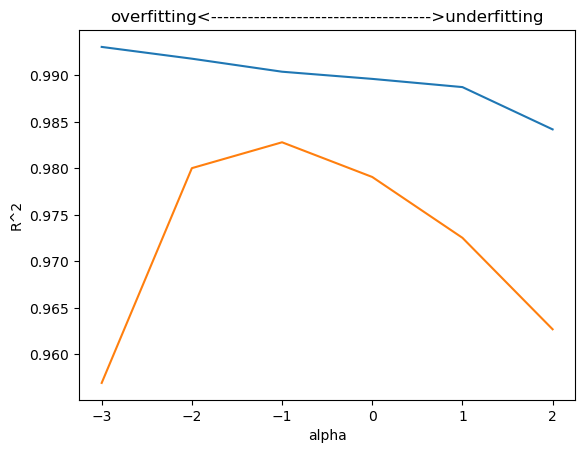

In [53]:
plt.plot(np.log10(alpha_list), train_score)    #훈련세트 그래프
plt.plot(np.log10(alpha_list), test_score)     # 테스트세트 그래프
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('overfitting<------------------------------------>underfitting')
plt.show()

In [54]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465387013


## 라쏘(Lasso)
* 또 다른 규제(L1)가 있는 선형 모델
* 릿지와 달리 계수값을 아예 0으로 만들 수 있다. 
* Max_iter는 알고리즘의 수행 반복 횟수를 지정.(기본값은 1000)

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [58]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [60]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list: 
    # 라쏘 모델을 만듭니다. 
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    # 라쏘 모델을 훈련합니다. 
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다. 
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


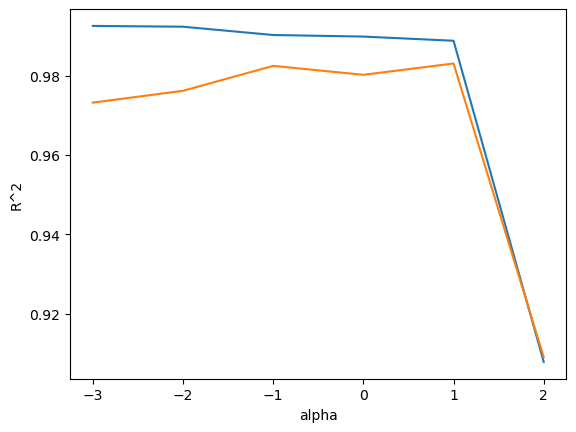

In [61]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [62]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [63]:
# 일부 특성을 아예 사용하지 않을수도 있다. 
print(np.sum(lasso.coef_ == 0))     # 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개. 사용하지 않은 특성이 40개이다. 

40
